<span style="font-size:30px; line-height:1.6;">How are animate and inanimate categories differentiated in a pre-trained artificial neural network?</span>

<span style="font-size:16px;line-height:1.6;">A central goal of social neuroscience is to identify neural processes that support  social interaction. Numerous analytical methods have been used to isolate regions of the brain sensitive to social and nonsocial images. However, confirming the validity of these findings requires studying the effects of lesions on the identified brain regions, a goal not possible in human participants and not well matched to animal behavior. Using recently established similarities between artificial neural networks (ANNs) and human brain representations, we sought to test the validity of several analytical methods in identifying groups of neurons central to a social function by studying the effects of specific lesions in an ANN. Beginning with Alexnet, a multilayer ANN trained to recognize objects, we clustered neurons based on their activation to images of animate and inanimate objects. We then lesioned each identified cluster to find those clusters whose lesions result in category-specific deficits in performance. Our results show that partition based methods can reliably retrieve clusters of artificial neurons that with sensitivity index up to 0.8 for both animate and inanimate objects. This implies that a clustering approach can be dependable for identifying neurons central to category-specific object identification. Further, we found that neurons from the significant cluster can be traced back to the early layers of the artificial neural network. This finding is surprising given representation similarity between ANNs and the brain has been demonstrated for later layers. This research provides grounds for improved understanding of cognitive processes central to social tasks.</span>


<span style="font-size:24px; line-height:1.6;">Data</span>

<span style="font-size:16px;line-height:1.6;">In this study, we begin with pre-trained Alexnet, a convolutional neural network trained to classify a given picture into one of 1000 object categories. Alexnet has 

The first ste </span>

<center><span style="font-size:20px; line-height:1.6;">Animate Categotries</span></center>


<table>
<tr><td><img src="../../data/animate/ILSVRC2012_val_00000993.JPEG" style="height:150px; width:150px"></td>
<td><img src="../../data/animate/ILSVRC2012_val_00025891.JPEG" style="height:150px; width:150px"></td>
<td><img src="../../data/animate/ILSVRC2012_val_00000247.JPEG" style="height:150px; width:150px"></td>
<td><img src="../../data/animate/ILSVRC2012_val_00012418.JPEG" style="height:150px; width:150px"></td></tr>
<tr>
    <td style="text-align:center">Siberian Husky ('n02110185')</td>
    <td style="text-align:center">Grey whale ('n02066245')</td>  
    <td style="text-align:center">Junco('n01534433')</td>
    <td style="text-align:center">Snail ('n01944390')</td>
</tr>
</table>
<center><span style="font-size:20px; line-height:1.6;text-align:center;">In-Animate Categories</span></center>
<table>
<tr>
<td><img src="../../data/inanimate/ILSVRC2012_val_00009820.JPEG" style="height:150px; width:150px"></td>
<td><img src="../../data/inanimate/ILSVRC2012_val_00002875.JPEG" style="height:150px; width:150px"></td>
<td><img src="../../data/inanimate/ILSVRC2012_val_00001572.JPEG" style="height:150px; width:150px"></td>
<td><img src="../../data/inanimate/ILSVRC2012_val_00002830.JPEG" style="height:150px; width:150px"></td>
</tr>
<tr>
    <td style="text-align:center">Bookcase ('n02870880')</td>
    <td style="text-align:center">Electric fan, blower ('n03271574')</td>  
    <td style="text-align:center">Toaster ('n04442312')</td>
    <td style="text-align:center">Fountain pen ('n03388183')</td>
</tr>
</table>
<center>Figure 1: Sample images (animate/inanimate) from imagenet validation dataset</center>

<span style="font-size:24px;line-height:1.6;">AlexNet Architecture</span>
<img src="../../data/misc/AlexNet-2012.png">
<center> Figure 2: Alexnet Architecture with five convolution layers and two fully connected layers</center>

In [ ]:
#Imports
import cPickle as pickle
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Histograms
with open('../../data/pkl/animate_fold_1_train_VGG16.pkl','rb') as f:
    data_animate = pickle.load(f)
    
with open('../../data/pkl/inanimate_fold_1_train_VGG16.pkl','rb') as f:
    data_inanimate = pickle.load(f)

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,7):
    ax = fig.add_subplot(2,4,i)
    if i==1:
        temp1 = data_animate[0:290400]
        temp2 = data_inanimate[0:290400]
        ax.set_title('Conv_1')
    elif i==2:
        temp1 = data_animate[290400:477024]
        temp2 = data_inanimate[290400:477024]
        ax.set_title('Conv_2')
    elif i==3:
        temp1 = data_animate[477024:541920]
        temp2 = data_inanimate[477024:541920]
        ax.set_title('Conv_3')
    elif i==4:
        temp1 = data_animate[541920:606816]
        temp2 = data_inanimate[541920:606816]
        ax.set_title('Conv_4')
    elif i==5:
        temp1 = data_animate[606816:650080]
        temp2 = data_inanimate[606816:650080]
        ax.set_title('Conv_5')
    elif i==6:
        temp1 = data_animate[650080:654176]
        temp2 = data_inanimate[650080:654176]
        ax.set_title('FC_1')
    elif i==7:
        temp1 = data_animate[654176:658272]
        temp2 = data_inanimate[654176:658272]
        ax.set_title('FC_2')
    ax.hist(temp1,bins=200, alpha=0.5,label='Animate')
    ax.hist(temp2,bins=200,  alpha=0.5,label='InAnimate')
    ax.legend()


In [ ]:
#Scatter plot

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.scatter(data_animate,data_inanimate)
ax.legend()
ax.set_xlabel('Animate')
ax.set_ylabel('InAnimate')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k--', alpha=0.75, zorder=1)

ax1 = fig.add_subplot(1,2,2)
hb = ax1.hexbin(data_animate,data_inanimate,gridsize=(25,25))
ax1.legend()
ax1.set_xlabel('Animate')
ax1.set_ylabel('InAnimate')
fig.colorbar(hb)

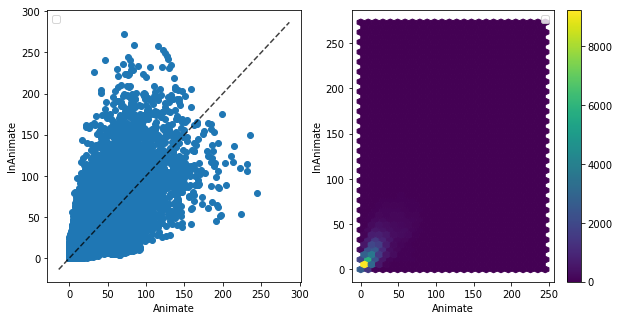

In [24]:
with open('../../data/pkl/kmeans_first_1.pickle','rb') as f:
    X_new,pred_kmeans,kmeans = pickle.load(f)

    
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.scatter(X_new[:,0],X_new[:,1])
ax.legend()
ax.set_xlabel('Animate')
ax.set_ylabel('InAnimate')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k--', alpha=0.75, zorder=1)

ax1 = fig.add_subplot(1,2,2)
hb = ax1.hexbin(X_new[:,0],X_new[:,1],gridsize=(25,25))
ax1.legend()
ax1.set_xlabel('Animate')
ax1.set_ylabel('InAnimate')
fig.colorbar(hb)

Problem
<img src="../../data/misc/problem.png">

Training-Test Cross - Validation

Lesioning and D prime

Scree plot
<table>
   <tr>
       <td><img src="../../results/scree/KMeans_results_fold_1.png"></td>
       <td><img src="../../results/scree/KMeans_results_fold_avg.png"></td>
    </tr>
</table>


<img src="../../results/scree/KMeans_results_density.png">

<table>
   <tr>
       <td><img src="../../results/scree/KMeans_results_ana.png"></td>
       <td><img src="../../results/scree/KMeans_results_ina.png"></td>
    </tr>
</table>

<table>
   <tr>
       <td><img src="../../results/scree/KMeans_results_ana_hist_alt.png"></td>
       <td><img src="../../results/scree/KMeans_results_ina_hist_alt.png"></td>
    </tr>
</table>

Discussion/Summary

Ideas/Next-Steps

References